In [1]:
import folium
import pandas as pd

# 数据
data = {
    '院校名称': ['东华大学', '天津工业大学', '苏州大学', '浙江理工大学', '江南大学', 
                '武汉纺织大学', '西安工程大学', '大连工业大学', '青岛大学', '四川大学',
                '北京服装学院', '中原工学院', '南通大学', '五邑大学', '嘉兴学院', 
                '闽江学院', '河北科技大学', '安徽工程大学', '江西服装学院', '成都纺织高等专科学校'],
    '经度': [121.4378, 117.1570, 120.6167, 120.3462, 120.3710, 
             114.3271, 108.9469, 121.6800, 120.3521, 104.0657,
             116.3000, 113.6935, 120.8759, 111.9792, 120.7530, 
             119.2983, 114.4981, 116.5980, 115.8601, 104.0731],
    '纬度': [31.2054, 39.1317, 31.2990, 30.2730, 31.9384, 
             30.5735, 34.2217, 38.9145, 36.0678, 30.5722,
             39.8310, 34.7572, 32.0152, 22.8701, 30.7460, 
             26.0705, 38.0428, 33.6357, 28.6805, 30.6612]
}

df = pd.DataFrame(data)

# 创建地图，设置初始视图为中国中心
m = folium.Map(location=[35.8617, 104.1954], zoom_start=5)

# 在地图上添加院校位置
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['纬度'], row['经度']],
        popup=row['院校名称'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# 保存地图
m.save('院校分布图.html')


C:\Users\86152\AppData\Local\Temp\ipykernel_42564\1239619575.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_papers['Year'] = school_papers['Year'].astype(int)


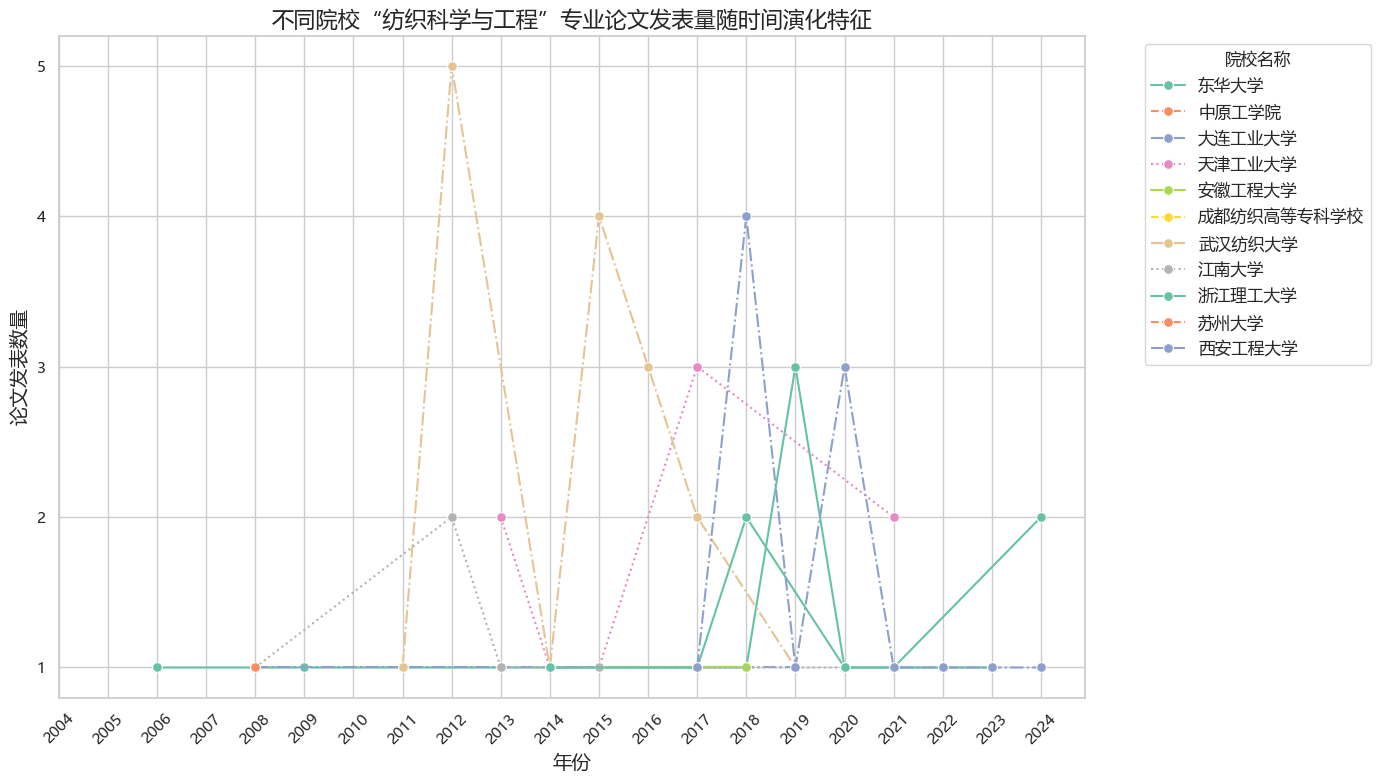

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib.ticker import MaxNLocator

# 读取CNKI的文献数据
df = pd.read_csv('data.csv')  # 替换为你的文件路径

# 学校名称列表
schools = [
    '东华大学', '天津工业大学', '苏州大学', '浙江理工大学', '江南大学', '武汉纺织大学', 
    '西安工程大学', '大连工业大学', '青岛大学', '四川大学', '北京服装学院', '中原工学院', 
    '南通大学', '五邑大学', '嘉兴学院', '闽江学院', '河北科技大学', '安徽工程大学', 
    '江西服装学院', '成都纺织高等专科学校'
]

# 处理缺失值：将NaN或缺失的Organ值替换为空字符串
df['Organ'] = df['Organ'].fillna('')

# 确保Organ列的类型为字符串，便于匹配学校名称
df['Organ'] = df['Organ'].astype(str)

# 创建一个新的列，用于标记文献属于哪个学校
def match_school(organ_name):
    # 遍历学校名称，进行部分匹配（不区分大小写）
    for school in schools:
        if school in organ_name:  # 如果Organ中包含学校名
            return school
    return None  # 如果没有匹配到任何学校，返回None

# 创建新的列，标记每篇文献的学校
df['学校'] = df['Organ'].apply(match_school)

# 只保留那些匹配到学校的文献
school_papers = df[df['学校'].notnull()]

# 确保年份为整数类型，避免月份或其他格式干扰
school_papers['Year'] = school_papers['Year'].astype(int)

# 按照院校和年份统计论文发表数量
school_paper_count = school_papers.groupby(['学校', 'Year']).size().reset_index(name='论文发表数量')

# 设置Seaborn的样式
sns.set(style="whitegrid")

# 自定义颜色和线型，增加区分度
palette = sns.color_palette("Set2", len(school_paper_count['学校'].unique()))  # 使用Set2调色板
line_styles = ['-', '--', '-.', ':']  # 线型列表

# 创建一个画布
plt.figure(figsize=(14, 8))

# 绘制不同学校的论文数量随年份变化的曲线
for i, (school, data) in enumerate(school_paper_count.groupby('学校')):
    sns.lineplot(data=data, x='Year', y='论文发表数量', label=school, 
                 linestyle=line_styles[i % len(line_styles)],  # 循环使用线型
                 marker='o', markersize=7, color=palette[i])  # 通过调色板指定颜色

# 设置图表标题和标签
plt.title('不同院校“纺织科学与工程”专业论文发表量随时间演化特征', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('论文发表数量', fontsize=14)

# 设置 y 轴为整数格式，并限定显示刻度范围为 [1, 2, 3, 4, 5]
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='upper', nbins=5))  # 5个刻度

# 设置中文字体，防止方框问题（适用于 Windows）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # Windows 用户可以使用 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 确保x轴只显示年份，不显示月份
plt.xticks(ticks=range(2004, 2025), rotation=45)  # 只显示 2004 到 2024 年

# 添加图例，调整位置和大小
plt.legend(title='院校名称', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# 显示图表
plt.tight_layout()
plt.savefig('纺织论文.png') 
plt.show()


In [31]:
# 定义纺织专业分词词典
textile_terms = [
    "纺织品", "纺织材料", "织物", "纱线", "面料", "棉花", "羊毛", "丝绸", "化纤", "功能性纺织品",
    "环保纺织品", "防水织物", "吸湿排汗", "纳米纺织", "生物纤维", "天然纤维", "合成纤维", "聚酯纤维", "聚酰胺",
    "锦纶", "丙纶", "尼龙", "涤纶", "纺纱", "编织", "织造", "染整", "印染", "纺织染色", "面料整理",
    "无纺布", "纺织工艺", "织机", "经编", "纬编", "涂层", "热处理", "锻造", "阻燃织物", "干燥处理",
    "纺织工程", "纺织技术", "织物结构", "纺织设备", "纺织测试", "纺织染料", "聚合物", "纤维增强复合材料",
    "编织机械", "织造技术", "高性能纺织材料", "无缝织物", "智能纺织", "3D编织", "精密纺织", "纺织表面处理",
    "功能性织物", "医用纺织品", "航空纺织", "汽车内饰材料", "防护服", "运动服", "防火布料", "垃圾袋材料",
    "纺织辅料", "针织品", "被褥", "纺织科技", "纳米纺织", "电子纺织", "智能纺织品", "纺织废水处理",
    "环保纺织", "纺织物理性能", "纺织生物工程", "纺织数据分析", "纺织大数据", "纺织界面", "纺织强度",
    "纺织弹性", "织物抗菌性", "织物抗紫外线", "织物透气性", "色牢度", "织物拉伸性", "纺织学", "织物耐磨性",
    "纤维长短"
]

# 将词汇保存为.txt文件
file_path = 'textile_dict.txt'

with open(file_path, 'w', encoding='utf-8') as f:
    for term in textile_terms:
        f.write(term + '\n')

print(f"词典已保存至 {file_path}")


词典已保存至 textile_dict.txt


In [41]:
# 定义扩展版的纺织专业停用词表（包括数字和符号），确保是 list 类型
textile_stopwords = [
    "研究", "分析", "提出", "方法", "效果", "探讨", "实践", "应用", "问题", "设计", "改进", "发展", "创新",
    "目标", "结果", "方案", "实验", "测试", "数据", "评估", "结果", "结论", "探索", "实现", "条件", "构建",
    "综述", "探讨", "调查", "分析", "进展", "对比", "学习", "技术", "评价", "现象", "学术", "领域", "论文",
    "作者", "研究者", "学科", "学会", "会议", "会议论文", "期刊", "综述文章", "文献", "文献综述", "基于", "基础",
    "框架", "系统", "系统分析", "模式", "模型", "标准", "方式", "工具", "理论", "实验", "方法", "分析方法",
    "学院", "系", "部", "研究所", "研究中心", "学校", "学部", "课程", "实验室", "专家", "教授", "学者", "导师",
    "纺织学院", "纺织工程系", "材料科学与工程", "纺织技术与工程", "化学工程学院", "机械工程学院", "电子信息学院",
    "计算机学院", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "十", "百", "千", "万", "亿", "点", "%",
    "+", "-", "=", "×", "/", "#", "@", "&", "*", "(", ")", "[", "]", "{", "}", ",", ".", ";", ":", "“", "”",
    "'", "\"", "？", "！", "。", "，", "；", "：", "在", "于", "对", "通过", "和", "为", "对比", "之间", "以", "从",
    "到", "但是", "所以", "因此", "此外", "等", "这种", "这些", "它们", "就是", "通过", "此", "所", "而", "甚至",
    "也", "其中", "该", "相关", "方式", "并", "与", "对于", "应用"
]

# 确保停用词表为 list 类型
textile_stopwords = list(textile_stopwords)

# 将停用词保存为.txt文件
file_path = 'textile_stopwords.txt'

with open(file_path, 'w', encoding='utf-8') as f:
    for word in textile_stopwords:
        f.write(word + '\n')

print(f"扩展版停用词表（包括数字和符号）已保存至 {file_path}")

# 打印停用词表的类型，确保它是 list
print(type(textile_stopwords))  # 应该显示 <class 'list'>

# 使用CountVectorizer时，传入停用词列表
vectorizer = CountVectorizer(stop_words=textile_stopwords, max_features=50)

扩展版停用词表（包括数字和符号）已保存至 textile_stopwords.txt
<class 'list'>


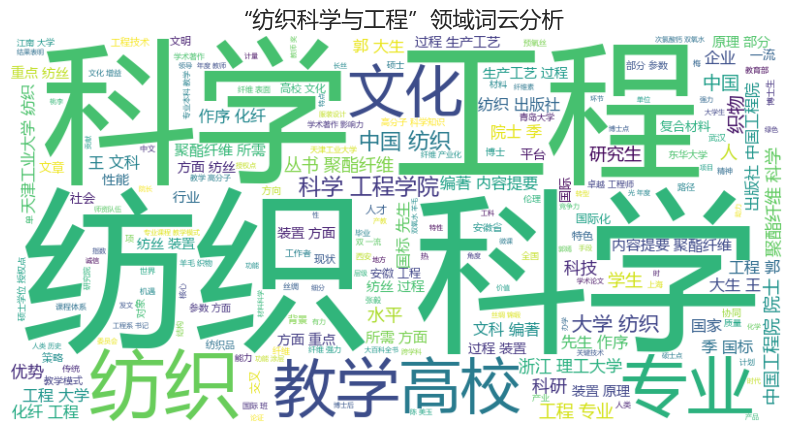

C:\Users\86152\AppData\Local\Temp\ipykernel_42564\2516678735.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=term_df, x='词语', y='词频', palette='Set2')


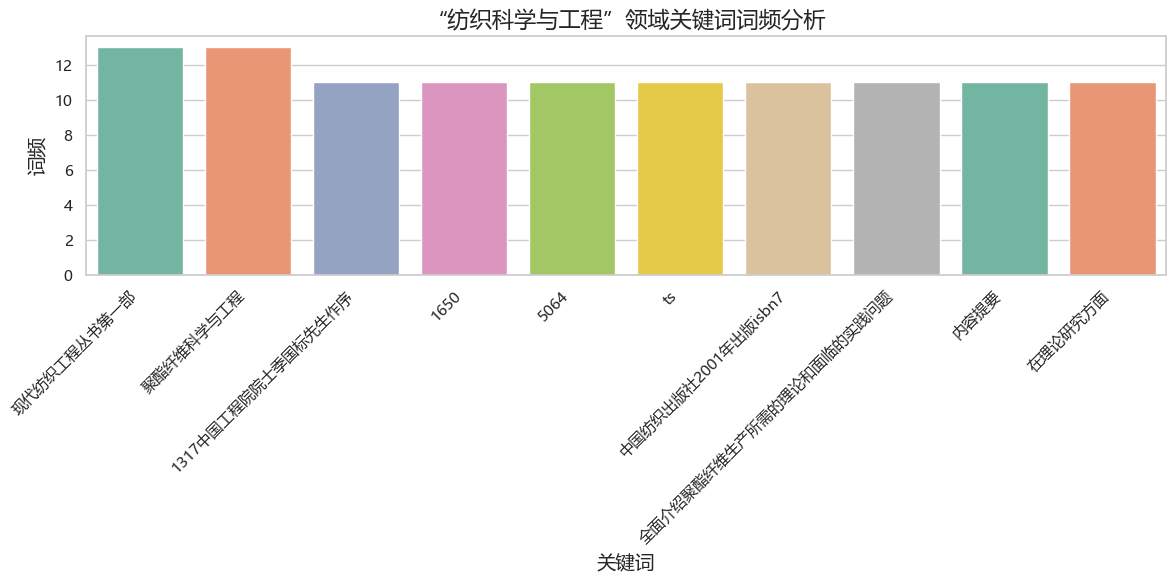

  SrcDatabase  论文发表数量
0          期刊      68


C:\Users\86152\AppData\Local\Temp\ipykernel_42564\2516678735.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=journal_count, x='SrcDatabase', y='论文发表数量', palette='Set2')


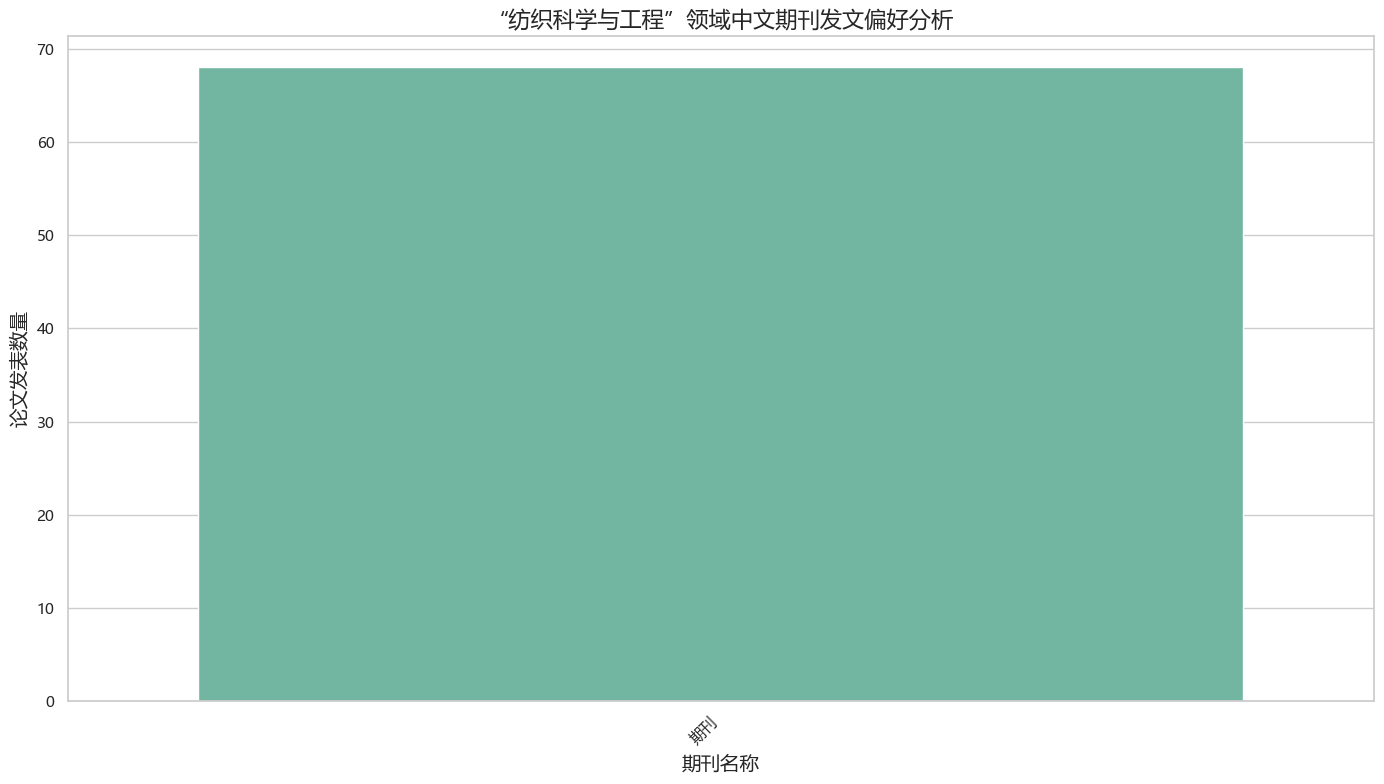

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import jieba
import jieba.posseg as pseg
from matplotlib import rcParams

# 配置matplotlib支持中文字体
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 或者使用 'SimHei'、'STHeiti' 等适合的字体
rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 读取数据
df = pd.read_csv('data1.csv')  # 请根据实际文件路径调整

# 处理缺失值：将NaN或缺失的Organ值替换为空字符串
df['Organ'] = df['Organ'].fillna('')
df['Title'] = df['Title'].astype(str)
df['Summary'] = df['Summary'].astype(str)

# 定义纺织专业相关领域的关键词
keywords = ['纺织品', '纺织材料', '织物', '纺织工程', '纺织科学', '纺织技术']

# 创建一个新列，用于标记论文是否属于目标领域
def match_keywords(title):
    for keyword in keywords:
        if keyword in title:
            return True
    return False

df['是否纺织科学与工程领域'] = df['Title'].apply(match_keywords)

# 只保留相关领域的论文
textile_papers = df[df['是否纺织科学与工程领域']]

# 自定义纺织专业分词词典和停用词表
jieba.load_userdict('textile_dict.txt')  # 纺织专业分词词典，需自行创建并维护
stop_words = [line.strip() for line in open('textile_stopwords.txt', 'r', encoding='utf-8').readlines()]
# 新增更严格的通用关键词列表
generic_keywords = ['介绍', '实践', '理论', '问题', '研究', '生产', '全面']
# 将通用关键词加入停用词表
stop_words.extend(generic_keywords)

# 1. 词频分析和词云生成
# 合并标题和摘要进行分词处理
text = " ".join(textile_papers['Title'].astype(str).tolist() + textile_papers['Summary'].astype(str).tolist())

# 使用jieba进行中文分词并筛选词性（保留名词等有实际意义的词性）
words = pseg.cut(text)
filtered_words = [word.word for word in words if word.word not in stop_words and word.flag.startswith('n')]
word_list = " ".join(filtered_words)

# 生成词云
wordcloud = WordCloud(font_path='C:/Windows/Fonts/msyh.ttc',  # 设置字体路径，确保支持中文
                      width=800,
                      height=400,
                      background_color='white').generate(word_list)

# 绘制词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('“纺织科学与工程”领域词云分析', fontsize=16)
plt.show()

# 2. 关键词共现分析
# 先合并所有论文的标题和摘要文本
all_texts = []
for index, row in textile_papers.iterrows():
    combined_text = row['Title'] + " " + row['Summary']
    all_texts.append(combined_text)

# 使用CountVectorizer进行词频统计，将合并后的文本传入
vectorizer = CountVectorizer(stop_words=stop_words, max_features=50)
X = vectorizer.fit_transform(all_texts)
terms = vectorizer.get_feature_names_out()

# 获取每个词的词频
term_freq = X.toarray().sum(axis=0)
term_freq_dict = dict(zip(terms, term_freq))

# 选出出现频率前10的词汇
common_terms = Counter(term_freq_dict).most_common(10)

# 绘制关键词共现的条形图
term_df = pd.DataFrame(common_terms, columns=['词语', '词频'])

plt.figure(figsize=(12, 6))
sns.barplot(data=term_df, x='词语', y='词频', palette='Set2')
plt.title('“纺织科学与工程”领域关键词词频分析', fontsize=16)
plt.xlabel('关键词', fontsize=14)
plt.ylabel('词频', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. 期刊发文偏好分析
# 按期刊统计论文发表数量
journal_count = textile_papers.groupby('SrcDatabase').size().reset_index(name='论文发表数量')

# 查看统计结果
print(journal_count)

# 绘制各期刊的发文数量
plt.figure(figsize=(14, 8))
sns.barplot(data=journal_count, x='SrcDatabase', y='论文发表数量', palette='Set2')

# 设置标题和标签
plt.title('“纺织科学与工程”领域中文期刊发文偏好分析', fontsize=16)
plt.xlabel('期刊名称', fontsize=14)
plt.ylabel('论文发表数量', fontsize=14)

# 旋转x轴标签
plt.xticks(rotation=45, ha='right')

# 显示图表
plt.tight_layout()
plt.show()

度中心性排名前5的作者：
 陈益人: 0.06639004149377593
 孙冬阳: 0.04564315352697095
 张得昆: 0.03734439834024896
 徐秋燕: 0.03319502074688797
阳玉球: 0.029045643153526972
 权震震: 0.029045643153526972
 高婷婷: 0.029045643153526972
 刘夏慧: 0.029045643153526972
 袁海源: 0.029045643153526972
 姚澜: 0.029045643153526972
 马颜雪: 0.029045643153526972
 曹凯: 0.029045643153526972
 张亭亭: 0.029045643153526972
 易长海: 0.029045643153526972
 甘厚磊: 0.029045643153526972
 田磊: 0.029045643153526972
 董子靖: 0.024896265560165977
 张星: 0.024896265560165977
潘馨旖: 0.024896265560165977
 李佳怡: 0.024896265560165977
 应希雅: 0.024896265560165977
 刘玲极: 0.024896265560165977
 张涵: 0.024896265560165977
 冯华峰: 0.024896265560165977
 刘晨: 0.024896265560165977
牛方: 0.024896265560165977
 易芳: 0.024896265560165977
 肖莹: 0.024896265560165977
 高华斌: 0.024896265560165977
 董正: 0.024896265560165977
 梁龙: 0.024896265560165977
 钟梦夏: 0.024896265560165977
刘延波: 0.024896265560165977
 张立改: 0.024896265560165977
 杨媛媛: 0.024896265560165977
 任倩: 0.024896265560165977
 Samman H.Bukhari: 0.02489626556016

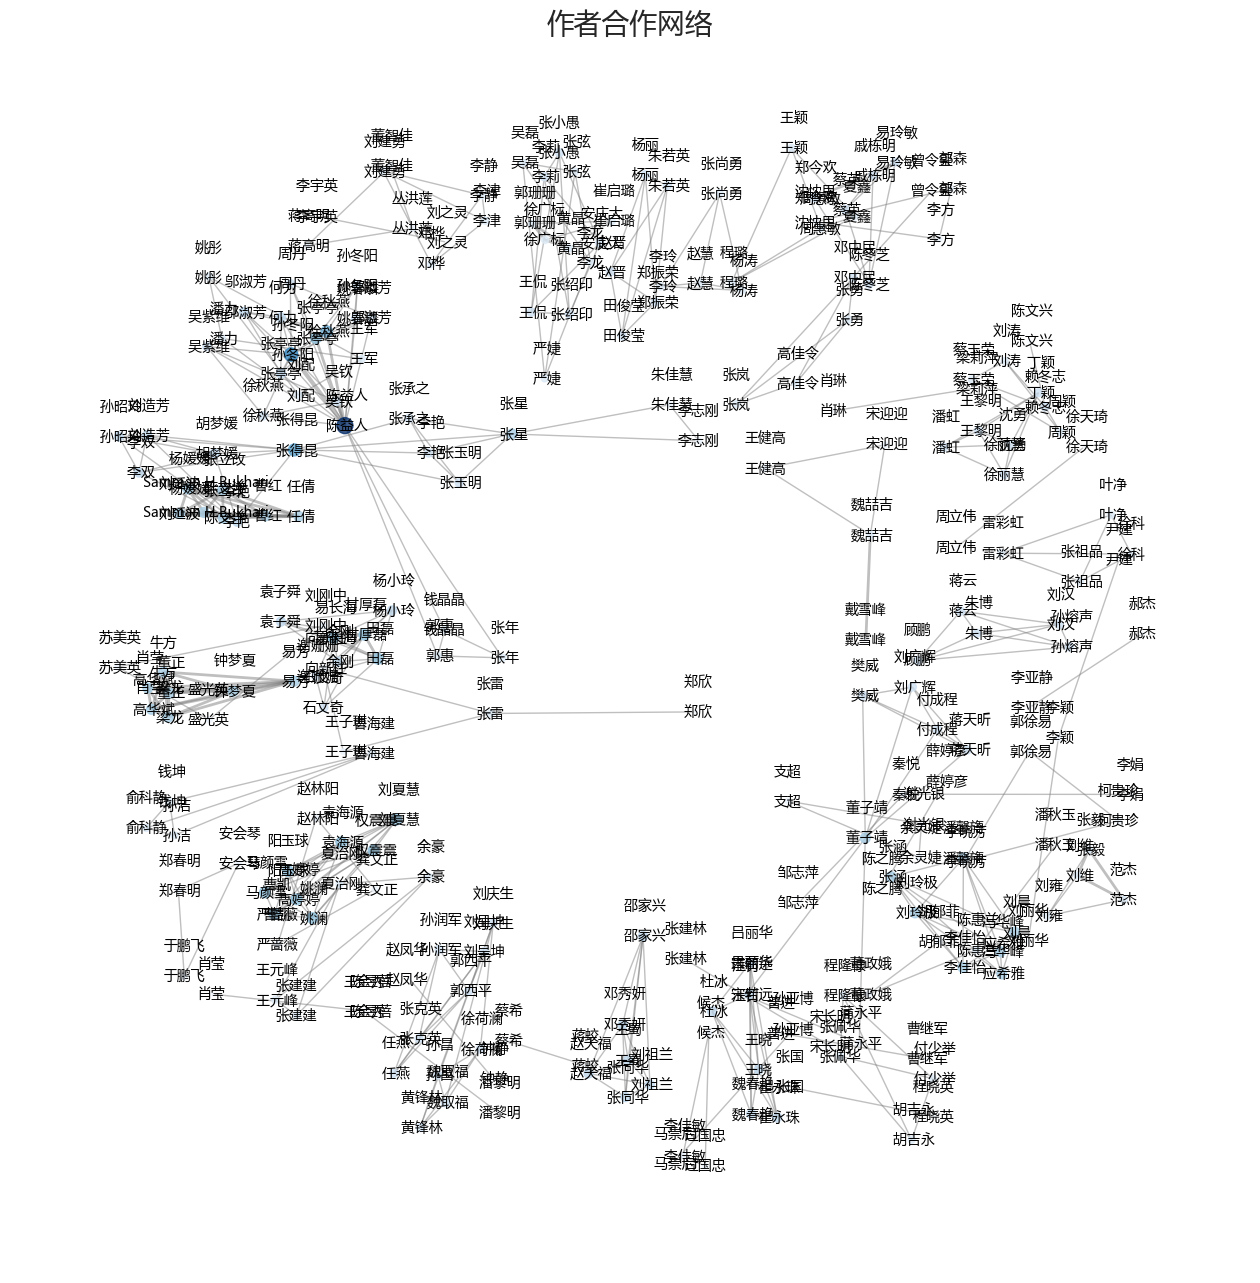

期刊发文偏好分析：


C:\Users\86152\AppData\Local\Temp\ipykernel_42564\2051786708.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=journal_count, x='SrcDatabase', y='论文发表数量', palette='Set2')


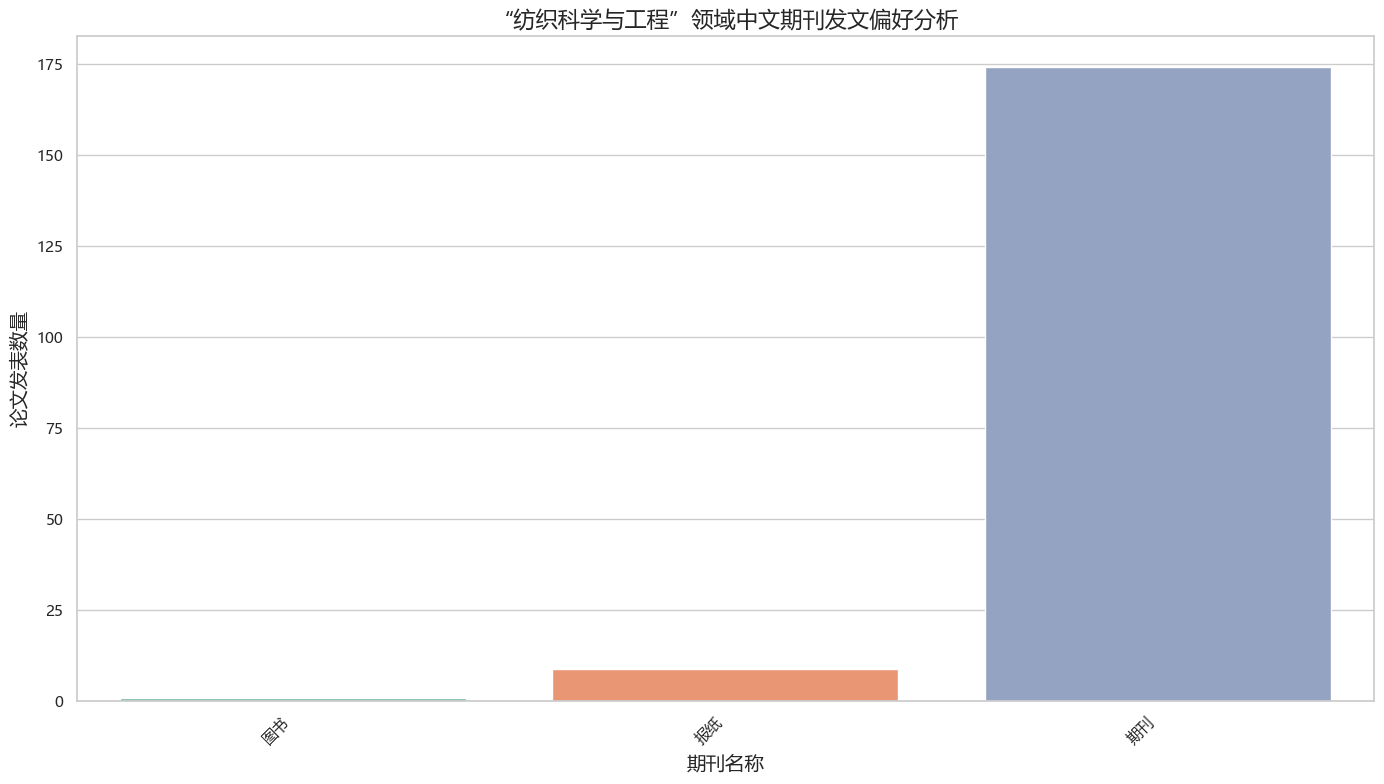

,SrcDatabase,论文发表数量
0,图书,1
1,报纸,9
2,期刊,174


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations

# 1. 加载数据
df = pd.read_csv('data1.csv')  # 请确保文件路径正确

# 2. 数据清洗：处理缺失值和作者分割
df['Author'] = df['Author'].fillna('')  # 去除空值
df['Authors_list'] = df['Author'].apply(lambda x: x.split(';'))  # 假设多个作者用分号分隔

# 3. 创建合作网络
G = nx.Graph()

# 统计每对作者合作的次数
for authors in df['Authors_list']:
    # 获取所有作者的两两组合
    author_pairs = combinations(authors, 2)
    for pair in author_pairs:
        if G.has_edge(pair[0], pair[1]):
            G[pair[0]][pair[1]]['weight'] += 1  # 增加边的权重
        else:
            G.add_edge(pair[0], pair[1], weight=1)  # 初次添加边

# 4. 计算网络中心性指标：度中心性、介数中心性和紧密度中心性
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# 5. 显示度中心性排名前5的作者
top_authors_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("度中心性排名前5的作者：")
for author, score in top_authors_degree[:]:
    print(f"{author}: {score}")

# 6. 可视化作者合作网络
plt.figure(figsize=(16, 16))

# 使用Spring布局进行可视化
pos = nx.spring_layout(G, k=0.2, iterations=30)  # 使用更大的k值，调整图形布局，使得结点之间距离更大

# 节点大小按度中心性调整
node_size = [v * 2000 for v in degree_centrality.values()]  # 节点大小根据度中心性调整
node_color = [v for v in degree_centrality.values()]  # 节点的颜色按度中心性调整，度中心性高的节点颜色较深

# 边的宽度按合作次数（权重）调整
edge_width = [G[u][v]['weight'] for u, v in G.edges()]

# 绘制网络图
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.Blues, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5, edge_color='gray')

# 增加节点标签
labels = {author: author for author in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black', font_family='sans-serif', verticalalignment='center')

# 增加标签偏移量，避免标签重叠
for label, (x, y) in pos.items():
    plt.text(x, y + 0.05, label, fontsize=10, ha='center', color='black')

# 设置图形标题和隐藏坐标轴
plt.title('作者合作网络', fontsize=20)
plt.axis('off')  # 关闭坐标轴

# 保存图像
plt.savefig("author_collaboration_network.png", format="PNG", dpi=300)

# 显示图形
plt.show()

# 7. 期刊发文偏好分析（可选）
journal_count = df.groupby('SrcDatabase').size().reset_index(name='论文发表数量')
print("期刊发文偏好分析：")
journal_count

# 绘制各期刊的发文数量
plt.figure(figsize=(14, 8))
sns.barplot(data=journal_count, x='SrcDatabase', y='论文发表数量', palette='Set2')
plt.title('“纺织科学与工程”领域中文期刊发文偏好分析', fontsize=16)
plt.xlabel('期刊名称', fontsize=14)
plt.ylabel('论文发表数量', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 保存发文偏好分析图
plt.savefig("journal_publication_preference.png", format="PNG", dpi=300)

# 显示图形
plt.show()

# 保存作者合作网络的度中心性数据到CSV
degree_centrality_df = pd.DataFrame(degree_centrality.items(), columns=['Author', 'Degree Centrality'])
degree_centrality_df.to_csv("degree_centrality.csv", index=False)
journal_count